In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module 
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/home/shared/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256)

Let's try to set up a basic model and train it for one epoch, to make sure the code works.

In [6]:
# establish network dimensions 
"""
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

fc_params = [54, 150, 100, 50, 3, 0.5]

"""

test_one = ThreeCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, fc_params)

In [17]:
# a check that the model parameters are correct 
print(test_one.layer0_params_all)
# for some reason, duplicate values (1's) are not being appended--why? 

[1, 3, 3, 1, 1, 1, 3, 93, 1, 1]


In [18]:
# construct layer models, FC model 
layer_models = test_one.forward_preprocess() 
fc_model = test_one.forward_fc()

In [19]:
# unpack layer models 
layer0_model = layer_models[0]
layer1_model = layer_models[1]
layer2_model = layer_models[2] 

In [27]:
# optimizer 
optimizer = optim.Adam(
    [{'params' : layer0_model.parameters()},
    {'params' : layer1_model.parameters()},
    {'params' : layer2_model.parameters()},
    {'params' : fc_model.parameters()}]
)
# train the network for one epoch 
train_ThreeCNN(loader_train, loader_val, layer0_model, layer1_model, layer2_model, fc_model, optimizer)

Iteration 0, loss = 0.3059
Iteration 100, loss = 0.0340
Iteration 200, loss = 0.0108
Iteration 300, loss = 0.0034
Iteration 400, loss = 0.0028
Iteration 500, loss = 0.0018
Iteration 600, loss = 0.0012
Iteration 700, loss = 0.0012


{'acc': [],
 'loss': [<function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor

In [3]:
# establish network dimensions 
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

fc_params = [54, 150, 100, 50, 3, 0.5]

In [7]:
# trying out the module API network 
module_test = ThreeCNN_Module(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, fc_params)

optimizer = optim.Adam(module_test.parameters())

# train the network for one epoch 
hist, bestModel = train(loader_train, loader_val, module_test, optimizer, epochs=2, returnBest=True)


Epoch 1/2:
Iteration 0, loss = 1.1110
Got 10293 / 30000 correct (34.31)

Iteration 100, loss = 0.6720
Got 19530 / 30000 correct (65.10)

Iteration 200, loss = 0.6291
Got 20574 / 30000 correct (68.58)

Iteration 300, loss = 0.5381
Got 21111 / 30000 correct (70.37)

Iteration 400, loss = 0.5409
Got 21361 / 30000 correct (71.20)

Iteration 500, loss = 0.5145
Got 21520 / 30000 correct (71.73)

Iteration 600, loss = 0.5282
Got 21692 / 30000 correct (72.31)

Iteration 700, loss = 0.4658
Got 21537 / 30000 correct (71.79)

Got 128337 / 180000 correct (71.30)
Got 21334 / 30000 correct (71.11)

Epoch 2/2:
Iteration 0, loss = 0.4962
Got 21380 / 30000 correct (71.27)

Iteration 100, loss = 0.5367
Got 21689 / 30000 correct (72.30)

Iteration 200, loss = 0.4877
Got 21695 / 30000 correct (72.32)

Iteration 300, loss = 0.5345
Got 21712 / 30000 correct (72.37)

Iteration 400, loss = 0.4862
Got 21845 / 30000 correct (72.82)

Iteration 500, loss = 0.4855
Got 21944 / 30000 correct (73.15)

Iteration 600,

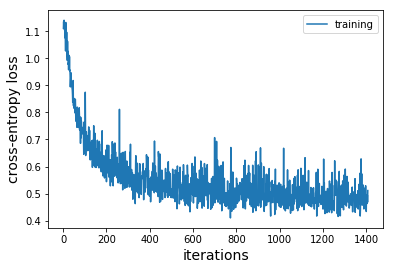

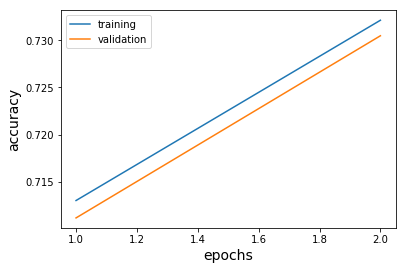

In [8]:
trainingMetrics(hist)

Min / max of y_test
0 2
(30000,)
-36.915634 7.711779


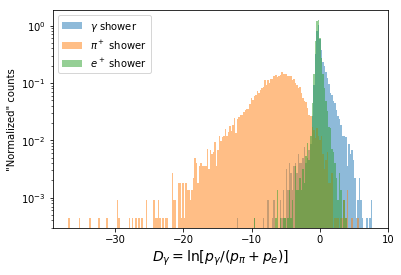

../plottingFcts.py:213: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


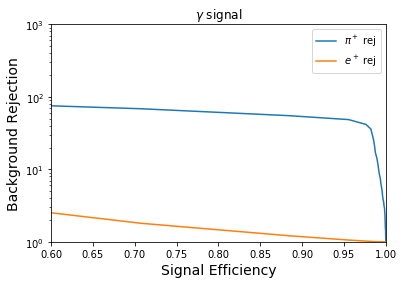

Min / max of y_test
0 2
(30000,)
-14.991066 33.269848


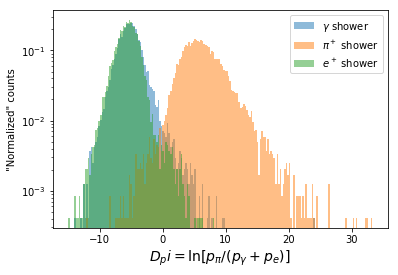

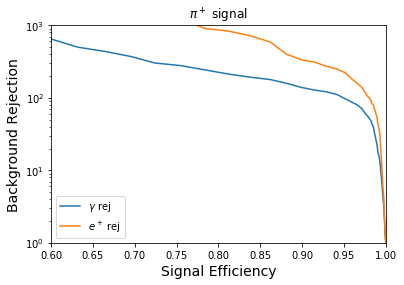

Min / max of y_test
0 2
(30000,)
-50.3591 1.738343


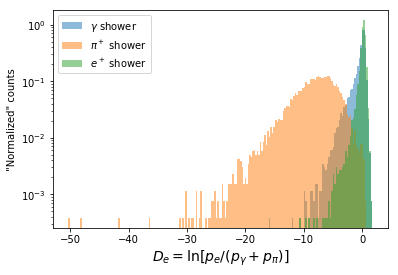

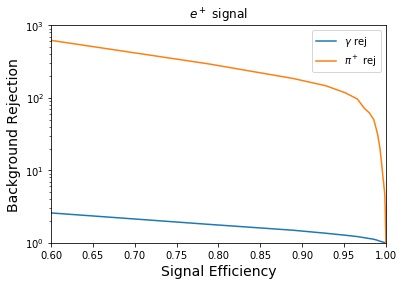

In [9]:
# get ROC curves for model 
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(module_test, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')